# Decision Tree Algorithm

In [1]:
from sklearn.datasets import make_classification
from sklearn import preprocessing, tree
from sklearn.model_selection import train_test_split

import pandas as pd

### Load data

In [2]:
weather_data = pd.read_csv("../datasets/weather.csv")
weather_data = weather_data.drop("id", axis=1)
weather_data

,outlook,temperature,humidity,wind,play
0,sunny,hot,high,weak,no
1,sunny,hot,high,strong,no
2,overcast,hot,high,weak,yes
3,rainy,mild,high,weak,yes
4,rainy,cool,normal,weak,yes
5,rainy,cool,normal,strong,no
6,overcast,cool,normal,strong,yes
7,sunny,mild,high,weak,no
8,sunny,cool,normal,weak,yes
9,rainy,mild,normal,weak,yes


### Pre-process data

**scikit-learn DecisionTreeClassifier** can not deal with categorical variable 

-> convert categorical variables into number(one-hot encoding or label encoding) 

In [3]:
# Label Encoding
le = preprocessing.LabelEncoder()
weather_data_le = weather_data.copy()
weather_data_le["outlook"] = le.fit_transform(weather_data_le["outlook"])
weather_data_le["temperature"] = le.fit_transform(weather_data_le["temperature"])
weather_data_le["humidity"] = le.fit_transform(weather_data_le["humidity"])
weather_data_le["wind"] = le.fit_transform(weather_data_le["wind"])
weather_data_le["play"] = le.fit_transform(weather_data_le["play"])

weather_data_le

,outlook,temperature,humidity,wind,play
0,2,1,0,1,0
1,2,1,0,0,0
2,0,1,0,1,1
3,1,2,0,1,1
4,1,0,1,1,1
5,1,0,1,0,0
6,0,0,1,0,1
7,2,2,0,1,0
8,2,0,1,1,1
9,1,2,1,1,1


In [4]:
# One-hot Encoding
weather_data_ohe = weather_data.copy()
weather_data_ohe["play"] = weather_data_ohe["play"].apply(lambda x: 1 if x == "yes" else 0)
weather_data_ohe = pd.get_dummies(weather_data_ohe)

weather_data_ohe

,play,outlook_overcast,outlook_rainy,outlook_sunny,temperature_cool,temperature_hot,temperature_mild,humidity_high,humidity_normal,wind_strong,wind_weak
0,0,0,0,1,0,1,0,1,0,0,1
1,0,0,0,1,0,1,0,1,0,1,0
2,1,1,0,0,0,1,0,1,0,0,1
3,1,0,1,0,0,0,1,1,0,0,1
4,1,0,1,0,1,0,0,0,1,0,1
5,0,0,1,0,1,0,0,0,1,1,0
6,1,1,0,0,1,0,0,0,1,1,0
7,0,0,0,1,0,0,1,1,0,0,1
8,1,0,0,1,1,0,0,0,1,0,1
9,1,0,1,0,0,0,1,0,1,0,1


### Build model

[Text(0.4444444444444444, 0.9, 'x[0] <= 0.5\nentropy = 0.94\nsamples = 14\nvalue = [5, 9]'),
 Text(0.3333333333333333, 0.7, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.5555555555555556, 0.7, 'x[2] <= 0.5\nentropy = 1.0\nsamples = 10\nvalue = [5, 5]'),
 Text(0.3333333333333333, 0.5, 'x[0] <= 1.5\nentropy = 0.722\nsamples = 5\nvalue = [4, 1]'),
 Text(0.2222222222222222, 0.3, 'x[3] <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.1111111111111111, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.3333333333333333, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.4444444444444444, 0.3, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.7777777777777778, 0.5, 'x[3] <= 0.5\nentropy = 0.722\nsamples = 5\nvalue = [1, 4]'),
 Text(0.6666666666666666, 0.3, 'x[1] <= 1.0\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.5555555555555556, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.7777777777777778, 0.1, 'entropy = 0.0\nsamples = 

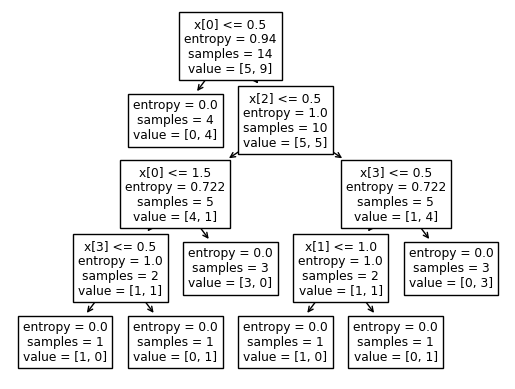

In [5]:
X_train = weather_data_le.drop("play", axis=1)
y_train = weather_data_le["play"]

model_le = tree.DecisionTreeClassifier(criterion="entropy", 
                               splitter="best", 
                               max_depth=None, 
                               random_state=42)

model_le.fit(X_train, y_train)

tree.plot_tree(model_le)


[Text(0.5555555555555556, 0.9, 'x[0] <= 0.5\nentropy = 0.94\nsamples = 14\nvalue = [5, 9]'),
 Text(0.4444444444444444, 0.7, 'x[7] <= 0.5\nentropy = 1.0\nsamples = 10\nvalue = [5, 5]'),
 Text(0.2222222222222222, 0.5, 'x[1] <= 0.5\nentropy = 0.722\nsamples = 5\nvalue = [4, 1]'),
 Text(0.1111111111111111, 0.3, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.3333333333333333, 0.3, 'x[8] <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.2222222222222222, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.4444444444444444, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.6666666666666666, 0.5, 'x[8] <= 0.5\nentropy = 0.722\nsamples = 5\nvalue = [1, 4]'),
 Text(0.5555555555555556, 0.3, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.7777777777777778, 0.3, 'x[2] <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.6666666666666666, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8888888888888888, 0.1, 'entropy = 0.0\nsamples = 

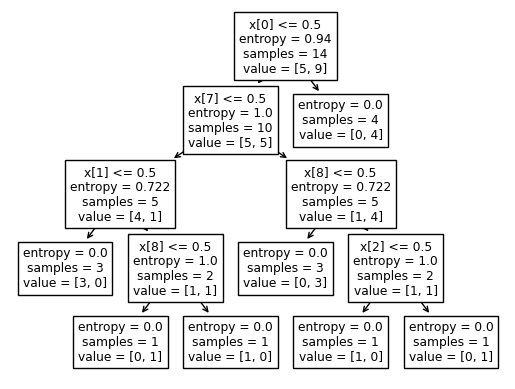

In [6]:
X_train = weather_data_ohe.drop("play", axis=1)
y_train = weather_data_ohe["play"]

model_ohe = tree.DecisionTreeClassifier(criterion="entropy", 
                               splitter="best", 
                               max_depth=None, 
                               random_state=42)

model_ohe.fit(X_train, y_train)

tree.plot_tree(model_ohe)